# Installing Dependencies

In [2]:
!pip -q install sentence-transformers tiktoken numpy langchain_groq langchain_huggingface langchain-chroma youtube-transcript-api pytube langchain_community

# Theory

### Understanding Tokens

In [3]:
import tiktoken

question = "How does ChatGPT's preprocessing handle multi-hyphenated-words, URLs (like https://example.com), and emojis 🤖?"

# Get the encoding
encoding = tiktoken.get_encoding("o200k_base")

# Encode the texts
question_encoded = encoding.encode(question)

# Print in table format
print("QUESTION:", question)
print("=" * 50)
print("Position".ljust(10), "Token ID".ljust(10), "Decoded Token")
print("-" * 50)
for pos, token in enumerate(question_encoded):
    decoded = encoding.decode_single_token_bytes(token)
    print(f"{str(pos).ljust(10)} {str(token).ljust(10)} {decoded}")



QUESTION: How does ChatGPT's preprocessing handle multi-hyphenated-words, URLs (like https://example.com), and emojis 🤖?
Position   Token ID   Decoded Token
--------------------------------------------------
0          5299       b'How'
1          2226       b' does'
2          17554      b' Chat'
3          162016     b'GPT'
4          885        b"'s"
5          162206     b' preprocessing'
6          5318       b' handle'
7          12151      b' multi'
8          4559       b'-h'
9          88         b'y'
10         22407      b'phen'
11         780        b'ated'
12         12         b'-'
13         10020      b'words'
14         11         b','
15         67852      b' URLs'
16         350        b' ('
17         9995       b'like'
18         5918       b' https'
19         1684       b'://'
20         18582      b'example'
21         1136       b'.com'
22         936        b'),'
23         326        b' and'
24         166700     b' emojis'
25         93643      b' \xf0\x9f\x

### Mapping Token ID to Vector Embeddings

In [4]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Initialize model
model = SentenceTransformer('all-MiniLM-L6-v2')

c:\Users\tansz\OneDrive\CS stuffs\langchain try\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\tansz\OneDrive\CS stuffs\langchain try\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tansz\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to 

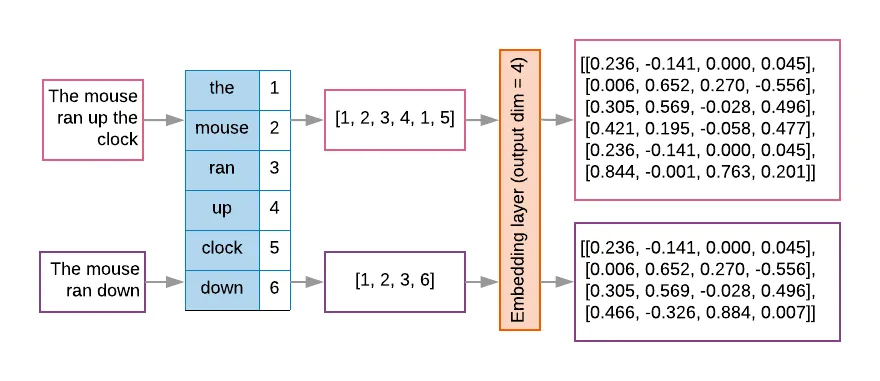

### Cosine Similarity between Vectors

In [5]:
# Generate embeddings
question = "What kinds of pets do I like?"
document = "My favorite pet is a cat."

query_result = model.encode(question)
document_result = model.encode(document)

# print(query_result)
# print(document_result)

# Calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

similarity = cosine_similarity(query_result, document_result)
print(f"\nEmbedding dimensions: {len(query_result)}")
print(f"Cosine Similarity: {similarity:.4f}")


Embedding dimensions: 384
Cosine Similarity: 0.5783


# Let's Start Building

### Loading Data from Websites

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

loader1 = WebBaseLoader("https://yashjain14.github.io/")

docs1 = loader1.load()

docs1

[Document(metadata={'source': 'https://yashjain14.github.io/', 'title': ' Yash Jain ', 'description': 'A simple, whitespace theme for academics. Based on [*folio](https://github.com/bogoli/-folio) design. ', 'language': 'en'}, page_content='        Yash Jain                      Toggle navigation        About (current)    Projects    CV     ctrl k                         Yash Jain  Student at Nanyang Technological University             I am an undergraduate student at Nanyang Technological University, pursuing a double bachelor’s in Computer Science and Business. Currently, I’m working on these projects:   Weaver: An AI-powered textile design platform that’s revolutionizing technical textile manufacturing processes in India. Secured $10,000 NTUitive grant.   SOPPU: Building a decentralized LLM inference system for scalable personalized AI by compressing LoRA adapters   GitHub / LinkedIn / Twitter / YouTube       © Copyright 2024 Yash Jain. Last updated: October 30, 2024.              

### Loading Data from YouTube Videos

In [ ]:
from langchain_community.document_loaders import YoutubeLoader

loader2 = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=UF8uR6Z6KLc", add_video_info=False
)

docs2 = loader2.load()

docs2

[Document(metadata={'source': 'UF8uR6Z6KLc'}, page_content='This program is brought to you by Stanford University. Please visit us at stanford.edu Thank You. I am honored to be with you today at your commencement from one of the finest universities in the world. Truth be told I never graduated from college and this is the closest I\'ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That\'s it. No big deal. Just three stories. The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out? It started before I was born. My biological mother was a young, unwed graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out the

### Merging Data Loaders

In [ ]:
from langchain_community.document_loaders.merge import MergedDataLoader

loader_all = MergedDataLoader(loaders=[loader1, loader2])

docs = loader_all.load()

### Spliting Data into smaller chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=200)

# Make splits
splits = text_splitter.split_documents(docs)

splits




[Document(metadata={'source': 'https://yashjain14.github.io/', 'title': ' Yash Jain ', 'description': 'A simple, whitespace theme for academics. Based on [*folio](https://github.com/bogoli/-folio) design. ', 'language': 'en'}, page_content='Yash Jain                      Toggle navigation        About (current)    Projects    CV     ctrl k                         Yash Jain  Student at Nanyang Technological University             I am an undergraduate student at Nanyang Technological University, pursuing a double bachelor’s in Computer Science and Business. Currently, I’m working on these projects:   Weaver: An AI-powered textile design platform that’s revolutionizing technical textile manufacturing processes in India. Secured $10,000 NTUitive grant.   SOPPU: Building a decentralized LLM inference system for scalable personalized AI by compressing LoRA adapters   GitHub / LinkedIn / Twitter / YouTube       © Copyright 2024 Yash Jain. Last updated: October 30, 2024.'),
 Document(metadata

### Indexing/Store the Data with Vector Stores

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
print(vectorstore.similarity_search("Steve Jobs got fired",k=1))
print(vectorstore.similarity_search("Yash Jain projects'",k=1))

[Document(metadata={'source': 'UF8uR6Z6KLc'}, page_content="I felt that I had let the previous generation of entrepreneurs down - that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over. I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life. During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing wom

### Saving Data in Persistent Directory

In [ ]:
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings, persist_directory="./chroma_db")

In [ ]:
vectorstore = Chroma(persist_directory="./chroma_db",embedding_function=embeddings)

### Integrating LLM (Mixtral 8x7b)

Get your API Key from here: https://console.groq.com/keys

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    api_key="GROQ_API_KEY",
    model_name="mixtral-8x7b-32768"
)

In [ ]:
llm.invoke("Where is NTU")

AIMessage(content="NTU refers to Nanyang Technological University, which is located in Singapore. It is one of the two major universities in the city-state, and is known for its strong programs in engineering, business, and technology. The university's main campus is located in the western part of Singapore, in the town of Jurong West. It covers an area of approximately 200 hectares and is home to a variety of facilities, including research centers, student dormitories, sports facilities, and a performing arts center.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 12, 'total_tokens': 121, 'completion_time': 0.172220657, 'prompt_time': 0.001921193, 'queue_time': 0.012592407, 'total_time': 0.17414185}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-59ee0081-5050-4e22-ac52-630481902bdb-0', usage_metadata={'input_tokens': 12, 'output_tokens': 109, 'total_to

# RAG Pipeline

In [ ]:
from langchain.prompts import ChatPromptTemplate
def rag(question: str, num_docs: int = 1):

    # 1. Retrieve relevant documents
    docs = vectorstore.similarity_search(question, k=num_docs)

    # 2. Format context from documents
    context = "\n\n".join([doc.page_content for doc in docs])

    # 3. Create RAG prompt
    prompt = ChatPromptTemplate.from_messages([
        ("system", """You are a helpful AI assistant.
        Answer the question based on the provided context.
        If you cannot answer from the context, say "I cannot answer this from the provided information."

        Context:
        {context}"""),
        ("human", "{question}")
    ])

    # 4. Get formatted prompt
    formatted_prompt = prompt.format(
        context=context,
        question=question
    )

    # 5. Get response
    response = llm.invoke(formatted_prompt)

    print("\n=== RAG Process Details ===")
    print("\nQuery:", question)
    print("\nRetrieved Context:", context)


    print("\nFormatted Prompt:", formatted_prompt)


    print("\n=========================== RAG Final Response ===========================")
    print("\nResponse:", response.content)

    return response.content

In [ ]:
question = "Project made by Yash Jain"
answer = rag(question)


=== RAG Process Details ===

Query: Project made by Yash Jain

Retrieved Context: Yash Jain                      Toggle navigation        About (current)    Projects    CV     ctrl k                         Yash Jain  Student at Nanyang Technological University             I am an undergraduate student at Nanyang Technological University, pursuing a double bachelor’s in Computer Science and Business. Currently, I’m working on these projects:   Weaver: An AI-powered textile design platform that’s revolutionizing technical textile manufacturing processes in India. Secured $10,000 NTUitive grant.   SOPPU: Building a decentralized LLM inference system for scalable personalized AI by compressing LoRA adapters   GitHub / LinkedIn / Twitter / YouTube       © Copyright 2024 Yash Jain. Last updated: October 30, 2024.

Formatted Prompt: System: You are a helpful AI assistant.
        Answer the question based on the provided context.
        If you cannot answer from the context, say "I cannot 

In [ ]:
question = "Why was steve jobs fired"
answer = rag(question)


=== RAG Process Details ===

Query: Why was steve jobs fired

Retrieved Context: I felt that I had let the previous generation of entrepreneurs down - that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over. I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life. During the next five years, I started a company named NeXT, another company named Pixar, and fell in lo

# Your Task:

## A Basic Python App

### Instruction

#### File 1: VectorStore.py

Store vector embedding in Vector Store in a persistent directory.


#### File 2: RAG.py

Retrieve data from Vector Store and generate response using LLM.

In [ ]:
!pip install sentence-transformers  numpy langchain_groq langchain_huggingface langchain-chroma youtube-transcript-api pytube langchain_community

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import YoutubeLoader
from langchain_community.document_loaders.merge import MergedDataLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader1 = WebBaseLoader("https://en.wikipedia.org/wiki/Wikipedia")

docs1 = loader1.load()



text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=200)

# Make splits
splits = text_splitter.split_documents(docs1)

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings, persist_directory="./chroma_db")


In [ ]:
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain.prompts import ChatPromptTemplate


embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(persist_directory="./chroma_db",embedding_function=embeddings)


llm = ChatGroq(
    api_key="gsk_c0PEQGmBavw2QylGRQ4jWGdyb3FYOUrQl8IBOFOyjMsfl9aG8Bcl",
    model_name="mixtral-8x7b-32768"
)



def rag(question: str, num_docs: int = 1):

    # 1. Retrieve relevant documents
    docs = vectorstore.similarity_search(question, k=num_docs)

    # 2. Format context from documents
    context = "\n\n".join([doc.page_content for doc in docs])

    # 3. Create RAG prompt
    prompt = ChatPromptTemplate.from_messages([
        ("system", """You are a helpful AI assistant.
        Answer the question based on the provided context.
        If you cannot answer from the context, say "I cannot answer this from the provided information."

        Context:
        {context}"""),
        ("human", "{question}")
    ])

    # 4. Get formatted prompt
    formatted_prompt = prompt.format(
        context=context,
        question=question
    )

    # 5. Get response
    response = llm.invoke(formatted_prompt)

    print("\n=== RAG Process Details ===")
    print("\nQuery:", question)
    print("\nRetrieved Context:", context)


    print("\nFormatted Prompt:", formatted_prompt)


    print("\n=========================== RAG Final Response ===========================")
    print("\nResponse:", response.content)

    return response.content



rag("Milestones of wikipedia")